In [1]:
import os, random, matplotlib, pickle, yaml, tqdm
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
from glob2 import glob

SMALL_SIZE, MEDIUM_SIZE = 9, 12

In [2]:
root_path = "/Users/donghur/Desktop/Research/Murthy/BM_GPU"
result_path = "/Users/donghur/Desktop/Research/Murthy/BM_GPU/results/round2_legs_antennae_resnet101"

with open(f"{result_path}/INFO.yaml") as f:
    INFO = yaml.load(f, Loader=yaml.FullLoader)
    INFO_values = list(INFO.values())
    INFO_values.sort(key=lambda x: x['order'])
    
config_path = "/Users/donghur/Desktop/Research/Murthy/BM_GPU"
with open(f"{config_path}/config.yaml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [10]:
tot_bp, tot_bp_scaled, tot_bp_rotated, tot_body_orientation, tot_angles, tot_rotations, tot_power, tot_embed, tot_loc = [], [], [], [], [], [], [], [], []
for file in tqdm(INFO_values):
    if os.path.exists(f"{root_path}/{file['directory']}/global_location.npy"):
        tot_bp.append( np.load(f"{root_path}/{file['directory']}/bodypoints.npy") )
        tot_bp_scaled.append( np.load(f"{root_path}/{file['directory']}/scaled_bodypoints.npy") )
        tot_bp_rotated.append( np.load(f"{root_path}/{file['directory']}/rotated_bodypoints.npy") )
        tot_body_orientation.append( np.load(f"{root_path}/{file['directory']}/body_orientation_angles.npy") )
        tot_angles.append( np.load(f"{root_path}/{file['directory']}/angles.npy") )
        tot_power.append( np.load(f"{root_path}/{file['directory']}/power.npy") )
        
        embed_np = np.load(f"{root_path}/{file['directory']}/embeddings.npy") 
        loc_np = np.load(f"{root_path}/{file['directory']}/global_location.npy")
        tot_embed.append( embed_np )
        tot_loc.append( loc_np )
        
        # check if lengths match
        if embed_np.shape[0] - loc_np.shape[0] != 0:
            print(file['directory'])

tot_bp = np.concatenate(tot_bp)
tot_bp_scaled = np.concatenate(tot_bp_scaled)
tot_bp_rotated = np.concatenate(tot_bp_rotated)
tot_body_orientation = np.concatenate(tot_body_orientation)
tot_angles = np.concatenate(tot_angles)
tot_power = np.concatenate(tot_power, axis=2)
tot_embed = np.concatenate(tot_embed)
tot_loc = np.concatenate(tot_loc)

In [11]:
print(tot_embed.shape)
print(tot_loc.shape)

(787651, 3)
(787651, 2)


<hr>

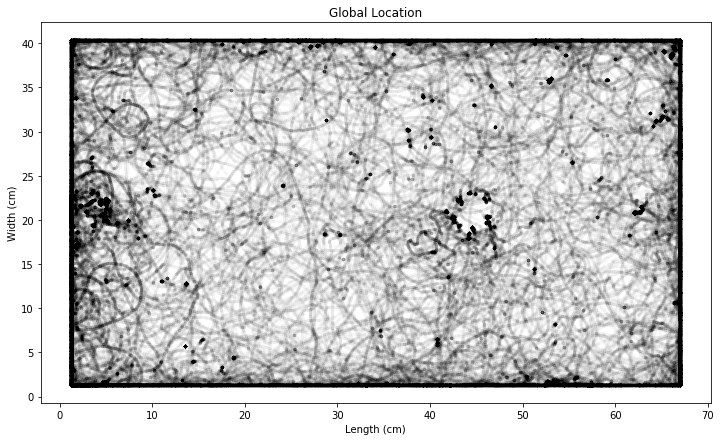

In [14]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(tot_loc[:,0], tot_loc[:,1], s=7, c='k', alpha=0.01)
ax.set(xlabel='Length (cm)', ylabel='Width (cm)', title=f"Global Location")
plt.show()

NameError: name 'macro_loc' is not defined

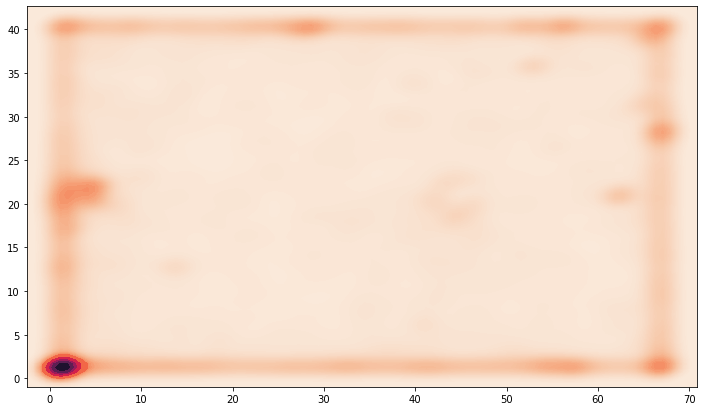

In [16]:
fig, ax = plt.subplots(figsize=(12,7))
sns.kdeplot(x=tot_loc[:,0], y=tot_loc[:,1], 
            shade=True, thresh=0, gridsize=100, bw_adjust=0.5,
            levels=100, cmap='rocket_r',
            cbar=False, ax=ax)
ax.scatter(tot_loc[:,0], tot_loc[:,1], s=7, c='k', alpha=0.01)
ax.set(xlabel='Length (cm)', ylabel='Width (cm)', title=f"Global Location")
plt.show()